In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Beta/Enhancement VS N 

In [2]:
# Plot of the effective temperature and the enhancement of the single-layer QAOA with optimal angles, as we 
# increase the number of spins N.
#*****************************************************************************************************

def plot_betavsN(ax,data,save_file,sigma=1):
    sns.set(rc={'figure.figsize':(15,8),"lines.linewidth": 2,"lines.markersize": 1,"font.family":"Times New Roman",
            'mathtext.fontset':"stix"},style='whitegrid')
    fontsize=36
    dat = data.loc[data['Sigma']==sigma].loc[data['NºQubits']>4]
    dat['Density_round']=round(dat['Density'],2)
    markers = ["o","v","^","<",">","8","s","P","p","*"]
    pl=sns.pointplot(x='NºQubits',y='Beta full energies',data=dat,ax=ax,hue='Density_round',markers=markers,ci=99,errwidth=2,capsize=0.1)
    ax.set_xlabel(r'Size ($N$)',fontsize=fontsize)
    ax.set_ylabel(r'$\beta$',fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    pl.legend(title=r'Density ($\rho$)',fontsize=30,ncol=5,handletextpad=0.1,title_fontsize=30,columnspacing=0.2)

    plt.savefig(save_file)
    plt.show(pl)

def plot_enhancementvsN(ax,data,save_file,sigma=1):
    sns.set(rc={'figure.figsize':(15,8),"lines.linewidth": 2,"lines.markersize": 1,"font.family":"Times New Roman",
            'mathtext.fontset':"stix"},style='whitegrid')
    fontsize=36
    dat = data.loc[data['Sigma']==sigma].loc[data['NºQubits']>4]
    dat['Density_round']=round(dat['Density'],2)
    markers = ["o","v","^","<",">","8","s","P","p","*"]
    pl=sns.pointplot(x='NºQubits',y='Enhancement',data=dat,ax=ax,hue='Density_round',markers=markers,ci=99,errwidth=2,capsize=0.1)
    ax.set_xlabel(r'Size ($N$)',fontsize=fontsize)
    ax.set_ylabel(r'$\xi$',fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    plt.yscale('log', base=2)

    pl.legend(title=r'Density ($\rho$)',fontsize=30,ncol=5,handletextpad=0.1,title_fontsize=30,columnspacing=0.2)

    plt.savefig(save_file)
    plt.show(pl)

### Objective function = Minimum of energy

In [5]:
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.1_Energy.pkl', 'rb') as f: 
    quboobs_ener=pickle.load(f)
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.2_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.30000000000000004_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.4_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.5_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.6_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.7000000000000001_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.8_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm0.9_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()
with open('expts/exp_observables-QUBO_nq6-22_nsamples500_Gnm1.0_Energy.pkl', 'rb') as f: 
    quboobs_ener = pd.concat((quboobs_ener, pickle.load(f)),ignore_index=True).reindex()

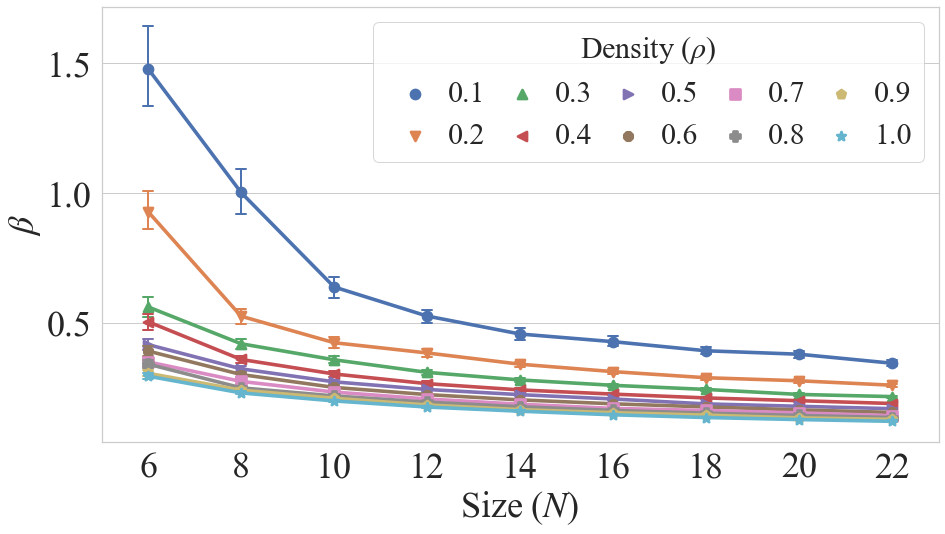

In [8]:
data = quboobs_ener
fig, ax = plt.subplots(1,1)
plot_betavsN(ax,data,"pictures/betaVSsize_density_qubo_energy.svg")

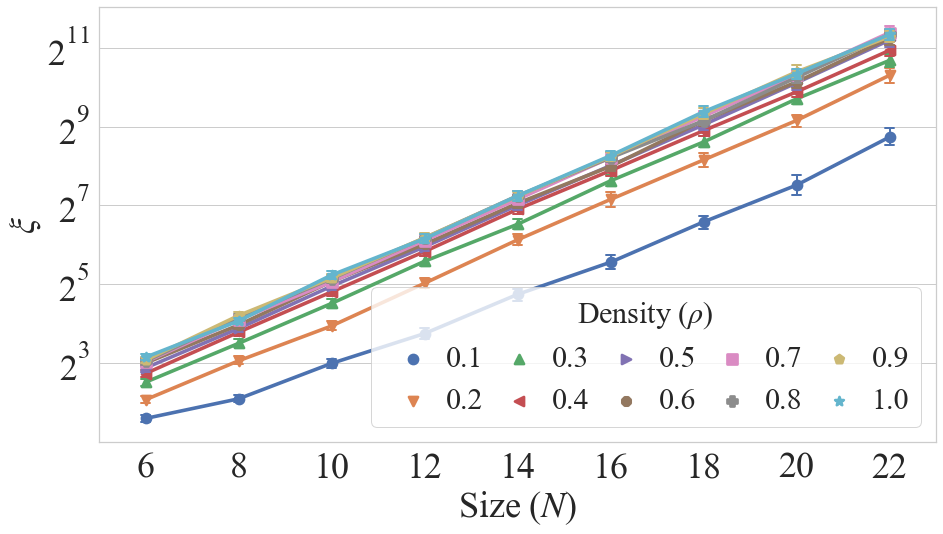

In [9]:
data = quboobs_ener
fig, ax = plt.subplots(1,1)
plot_enhancementvsN(ax,data,"pictures/enhancementVSsize_density_qubo_energy.svg")

# Beta VS Gamma/Theta 

In [10]:
# Plot of the effective temperature of the single-layer QAOA as we change the QAOA angle Gamma and we keep
# the QAOA angle theta fixed at its optimum value, and viceversa. 
#*****************************************************************************************************

def plot_betavsgamma(ax,data,save_file,nsamples=500,nqubits=np.arange(6,23,2),sigma=1):

    #First we sort the data in a new DataFrame. In data[i][j] the "i" identifies the sample, and "j" the angle gamma used
    # (we computed the algorithm with an array of different gammas).
    processed_data = pd.DataFrame(columns=['Gamma','Beta full energies','NºQubits'])
    nintervals = len(data['Gamma'][0])
    processed_data['Gamma']=[data['Gamma'][i][j] for i in range(nsamples*len(nqubits)) for j in range(nintervals)]
    processed_data['Beta full energies']=[data['Beta full energies'][i][j] for i in range(nsamples*len(nqubits)) for j in range(nintervals)]      
    processed_data['NºQubits']=[data['NºQubits'][i] for i in range(nsamples*len(nqubits)) for j in range(nintervals)]        

    sns.set(rc={'figure.figsize':(10,8),"lines.linewidth": 2,"lines.markersize": 5,"font.family":"Times New Roman",
            'mathtext.fontset':"stix"},style='whitegrid')
    fontsize=36
    sns.color_palette("Paired")
    processed_data = processed_data.loc[processed_data['NºQubits']>=8]
    sns.lineplot(data = processed_data, x='Gamma',y='Beta full energies', hue='NºQubits',style='NºQubits',ax=ax,palette="Set1",ci=99)
    ax.set_ylabel(r'$\beta$',fontsize=fontsize)
    ax.set_xlabel(r'$\gamma$',fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.legend(title=r'Size ($N$)',title_fontsize=26,fontsize=26,handletextpad=0.3,markerscale=2.5)
    ax.set_ylim((-0.07,0.32))
    
    plt.savefig(save_file)
    plt.show()

def plot_betavstheta(ax,data,save_file,nsamples=500,nqubits=np.arange(6,23,2),sigma=1):

    #First we sort the data in a new DataFrame. In data[i][j] the "i" identifies the sample, and "j" the angle theta used
    # (we computed the algorithm with an array of different thetas).
    processed_data = pd.DataFrame(columns=['Theta','Beta full energies','NºQubits'])
    nintervals = len(data['Theta Op'][0])
    processed_data['Theta']=[data['Theta Op'][i][j] for i in range(nsamples*len(nqubits)) for j in range(nintervals)]
    processed_data['Beta full energies']=[data['Beta full energies'][i][j] for i in range(nsamples*len(nqubits)) for j in range(nintervals)]      
    processed_data['NºQubits']=[data['NºQubits'][i] for i in range(nsamples*len(nqubits)) for j in range(nintervals)]        

    sns.set(rc={'figure.figsize':(10,8),"lines.linewidth": 2,"lines.markersize": 5,"font.family":"Times New Roman",
            'mathtext.fontset':"stix"},style='whitegrid')
    fontsize=36
    sns.color_palette("Paired")
    processed_data = processed_data.loc[processed_data['NºQubits']>=8]
    sns.lineplot(data = processed_data, x='Theta',y='Beta full energies', hue='NºQubits',style='NºQubits',ax=ax,palette="Set1",ci=99)
    ax.set_ylabel(r'$\beta$',fontsize=fontsize)
    ax.set_xlabel(r'$\theta$',fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.legend(title=r'Size ($N$)',title_fontsize=26,fontsize=26,handletextpad=0.3,markerscale=2.5)
    ax.set_ylim((-0.07,0.32))
    
    plt.savefig(save_file)
    plt.show()

### Objective function = Minimum of energy

In [11]:
with open('expts/exp_VSgamma-QUBO_nq6-22_nsamples500_Gnm0.9_Energy.pkl', 'rb') as f: 
    gammaresults_ener=pickle.load(f)
with open('expts/exp_VStheta-QUBO_nq6-22_nsamples500_Gnm0.9_Energy.pkl', 'rb') as f: 
    thetaresults_ener=pickle.load(f)

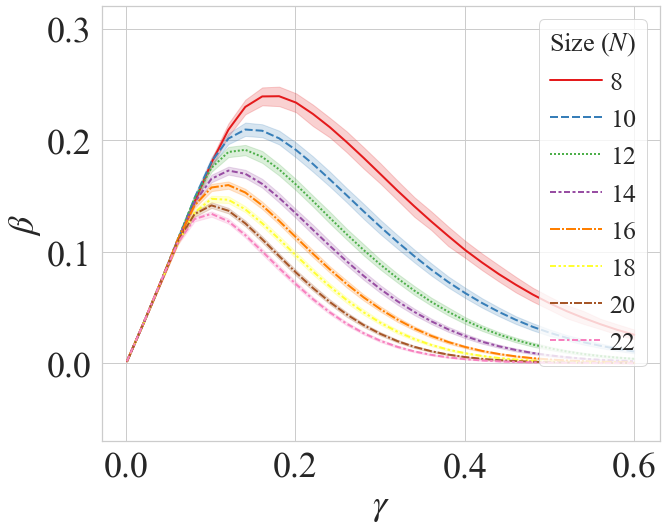

In [9]:
data = gammaresults_ener
fig, ax = plt.subplots(1,1)
plot_betavsgamma(ax,data,"pictures/betaVSgamma_den09_qubo_energy.svg",sigma=1)

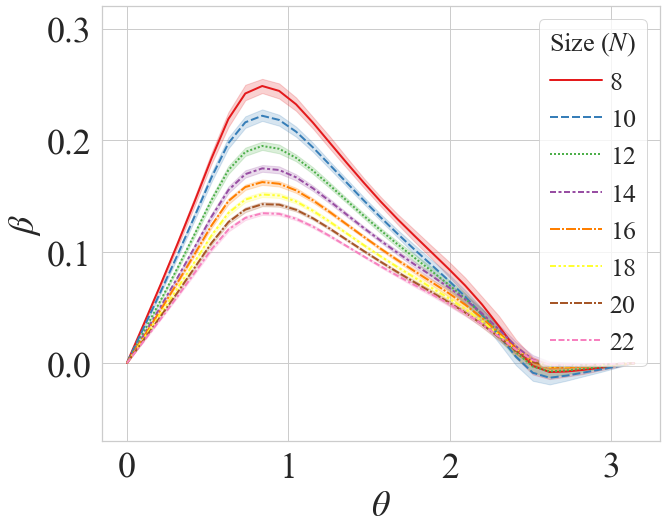

In [5]:
data = thetaresults_ener
fig, ax = plt.subplots(1,1)
plot_betavstheta(ax,data,"pictures/betaVStheta_den09_qubo_energy.svg",sigma=1)